In [11]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import chardet
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# encoding
with open('Twitter_Data.csv', 'rb') as file:
    result = chardet.detect(file.read())

encoding = result['encoding']
print(f'Detected encoding: {encoding}')

# Load social media data with the detected encoding
social_media_data = pd.read_csv('Twitter_Data.csv', encoding=encoding)

Detected encoding: Windows-1252


In [4]:
# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
        return ' '.join(tokens)
    else:
        return ''

social_media_data['processed_comments'] = social_media_data['comments'].apply(preprocess_text)

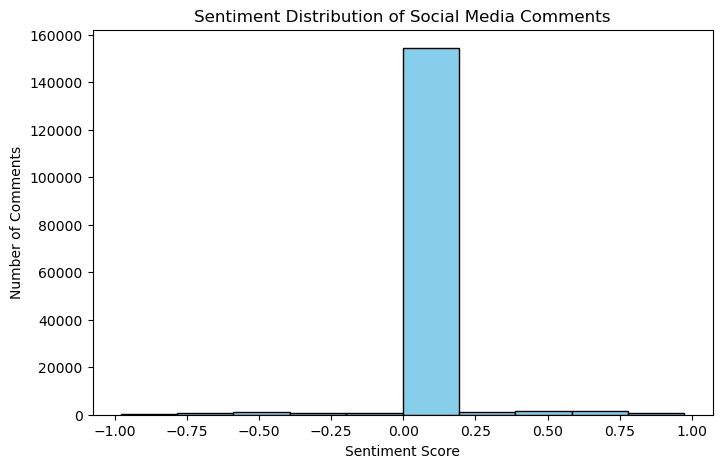

In [18]:
# Perform s_a and visualize it
sia = SentimentIntensityAnalyzer()
social_media_data['sentiment_score'] = social_media_data['processed_comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

plt.figure(figsize=(8, 5))
social_media_data['sentiment_score'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Social Media Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()

In [6]:
# Calculate the average sentiment score
average_sentiment = social_media_data['sentiment_score'].mean()
print(f"Average Sentiment Score: {average_sentiment:.2f}")

Average Sentiment Score: 0.01
